(3930, 3970)

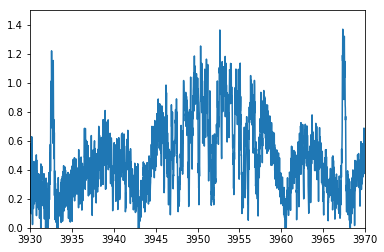

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from toolkit import EchelleSpectrum
import astropy.units as u
from astropy.io import fits

path = '/Users/bmmorris/data/cks/cks-k00003_bj122.81.fits'

hat11_spectrum = EchelleSpectrum.from_cks(path)
w = 3968*u.Angstrom

nearest_order = np.argmin(([abs(o.wavelength.mean() - w).value 
                            for o in hat11_spectrum.spectrum_list]))
order = hat11_spectrum.get_order(nearest_order)
rvshift = hat11_spectrum.rv_wavelength_shift(nearest_order, teff=4700)
order.plot()
plt.ylim([0, 1.5])
plt.xlim([3930, 3970])

In [2]:
from astropy.io import ascii
from astropy.table import Column
from astropy.constants import G, R_sun, M_sun, R_earth

table = ascii.read('cks_physical_merged.csv', format='csv')

koinum_col = Column([row.split('.')[0] for row in table['id_koicand'].data.data], 'koi_number')

table.add_column(koinum_col)
table.add_index('koi_number')

rstar = table['iso_srad'].data.data * R_sun
rplanet = table['iso_prad'].data.data
planet_density = np.zeros(len(rplanet)) * u.g / u.cm**3
planet_density[(rplanet > 4.5)] = 1 * u.g / u.cm**3
planet_density[(rplanet >= 1.5) & (rplanet <= 4.5)] = 2 * u.g / u.cm**3
planet_density[rplanet < 1.5] = 5 * u.g / u.cm**3
table.add_column(Column(planet_density, 'assumed_density'))

brightness_score = 1 - 10**(-0.4*(table['kic_kepmag'].max() - table['kic_kepmag']) / table['kic_kepmag'].ptp())
table.add_column(Column(brightness_score, 'brightness_score'))

(array([  2.01300000e+03,   2.00000000e+00,   4.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00]),
 array([     0.        ,    998.16735675,   1996.33471351,   2994.50207026,
          3992.66942701,   4990.83678377,   5989.00414052,   6987.17149727,
          7985.33885403,   8983.50621078,   9981.67356753,  10979.84092429,
         11978.00828104,  12976.17563779,  13974.34299455,  14972.5103513 ,
         15970.67770805,  16968.84506481,  17967.01242156,  18965.17977831

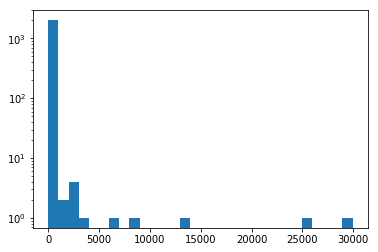

In [3]:
plt.hist(table['iso_prad'], 30, log=True)

(0, 10)

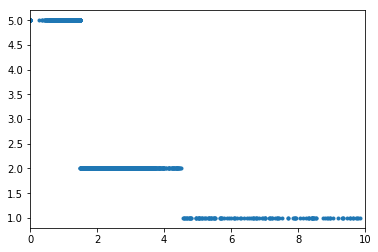

In [4]:
plt.plot(table['iso_prad'].data.data, table['assumed_density'].data.data, '.')
plt.xlim([0, 10])

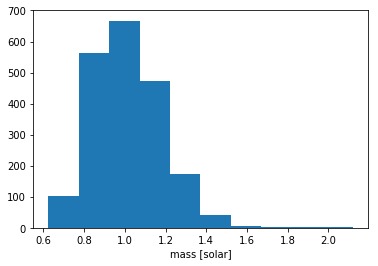

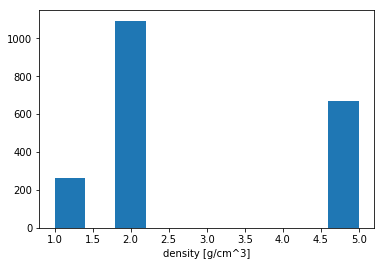

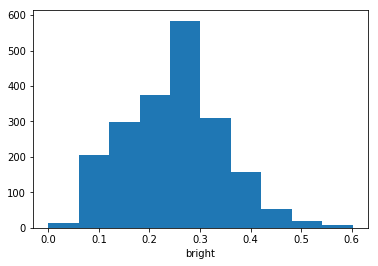

In [5]:
plt.hist(table['iso_smass'])
plt.xlabel('mass [solar]')

plt.figure()
plt.hist(planet_density)
plt.xlabel('density [g/cm^3]')

plt.figure()
plt.hist(brightness_score)
plt.xlabel('bright')

KOI-3
KOI-82
KOI-104
KOI-144
KOI-148
KOI-153
KOI-161
KOI-163
KOI-174
KOI-197
KOI-241
KOI-305
KOI-313
KOI-315
KOI-338
KOI-345
KOI-346
KOI-348
KOI-387
KOI-416
KOI-440
KOI-446
KOI-457
KOI-475
KOI-490
KOI-505
KOI-518
KOI-520
KOI-543
KOI-561
KOI-569
KOI-574
KOI-579
KOI-582
KOI-612
KOI-657
KOI-701
KOI-719
KOI-733
KOI-749
KOI-757
KOI-825
KOI-835
KOI-837
KOI-853
KOI-869
KOI-872
KOI-874
KOI-881
KOI-884
KOI-892
KOI-896
KOI-906
KOI-921
KOI-941
KOI-958
KOI-988
KOI-999
KOI-1050
KOI-1069
KOI-1199
KOI-1300
KOI-1305
KOI-1360
KOI-1367
KOI-1428
KOI-1480
KOI-1557
KOI-1563
KOI-1567
KOI-1590
KOI-1619
KOI-1726
KOI-1781
KOI-1797
KOI-1803
KOI-1831
KOI-1835
KOI-1841
KOI-1871
KOI-1877
KOI-1891
KOI-1904
KOI-1905
KOI-1938
KOI-1985
KOI-2033
KOI-2037
KOI-2048
KOI-2073
KOI-2119
KOI-2120
KOI-2173
KOI-2219
KOI-2248
KOI-2250
KOI-2261
KOI-2281
KOI-2287
KOI-2290
KOI-2339
KOI-2393
KOI-2399
KOI-2442
KOI-2469
KOI-2473
KOI-2498
KOI-2503
KOI-2521
KOI-2522
KOI-2529
KOI-2538
KOI-2694
KOI-2733
KOI-2762
KOI-2790
KOI-2828
KOI-2841

(3929, 3939)

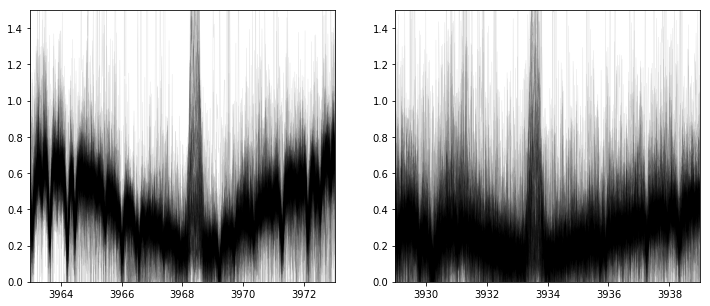

In [6]:
from astropy.utils.data import download_file 
from toolkit.activity import triangle_weighting
from astropy.table import Row

links = open('links_cached.txt').read().splitlines()

orders = []
table_entries = []

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
for link in links:
    koi_number = int(link.split('/')[-1].split('-')[1].split('_')[0][1:])
    path = download_file(link, cache=True)
    
    koi_num_str = "K{0:05d}".format(koi_number)
    if koi_num_str in table['koi_number'].data.data:
        table_this_koi = table.loc[koi_num_str]
        if not isinstance(table_this_koi, Row):
            innermost_planet = np.argmin(table_this_koi['koi_period'])
            table_entry = table_this_koi[innermost_planet]
        else: 
            table_entry = table_this_koi

        if table_entry['iso_prad'] < 20:

            print('KOI-{0:d}'.format(koi_number))
            s = EchelleSpectrum.from_cks(path, name='KOI-{0:d}'.format(koi_number))

            rv_shift = s.rv_wavelength_shift(nearest_order, teff=4700)
            s.offset_wavelength_solution(rv_shift)

            order = s.get_order(nearest_order)
            
            # Apply S/N cut:
            snr = np.nanmedian(order.flux)/np.nanmedian(order.uncertainty.array)
            if snr > 50:
                table_entries.append(table_entry)
                orders.append(order)
                order.plot(ax=ax[0], lw=0.5, alpha=0.1, color='k')
                order.plot(ax=ax[1], lw=0.5, alpha=0.1, color='k')

ax[0].set_ylim([0, 1.5])
ax[0].set_xlim([3968-5, 3968+5])

ax[1].set_ylim([0, 1.5])
ax[1].set_xlim([3934-5, 3934+5])

For planets in the solar system, the densities are constant to within a factor of two, so $\rho \propto M/R^3 = const$. Thus $M \propto R^3$. Then since radii are inferred from transit depth via $R_p/R_s\propto \sqrt{\delta} $, and we're interested in scaling with the physical size of the planet $R_p$, 

$$  M \propto R_p^3 \sim \left( \frac{R_p}{R_s} R_s \right)^3 = \left( \sqrt{\delta} R_s \right)^3 = \delta^{3/2} R_s^3$$

**Then we assume that tides scale as $M_p a^{-3}$ where $a$ is the innermost planet semimajor axis.** We can get the semimajor axis from Kepler's third: 

$$ a = \left(P^2 \frac{GM_s}{4\pi^2}\right)^{1/3}$$

Since we don't have stellar masses, let's take the approximation that $M_s \propto R_s$ for sun-like stars, thus

$$ a \propto \left(P^2 R_s\right)^{1/3}$$

In [7]:
from scipy.stats import binned_statistic
from toolkit.spectra import sigma_clipper, slice_spectrum, interpolate_spectrum
from sklearn.neighbors import KernelDensity
from toolkit.activity import triangle_weighting, true_h_centroid, true_k_centroid


# def normalize_order(order):
#     norm_band = (order.wavelength > 3945*u.Angstrom) & (order.wavelength < 3960*u.Angstrom)
#     return order.flux/np.nanmedian(order.flux[norm_band])
#    #return order.flux/np.nanmean(order.flux[order.wavelength > 3980*u.Angstrom])

def median_normalize(order):
    median = np.nanmedian(order.flux[order.wavelength > 3980*u.Angstrom])
    return order.flux/median, median

def normalize_order(order, model, plot=False):
    model_slice = slice_spectrum(model,
                                 order.masked_wavelength.min(),
                                 order.masked_wavelength.max(),
                                 norm=order.masked_flux.max())
    interp_target_slice = interpolate_spectrum(order, model_slice.wavelength)
    
    flux_ratio = median_normalize(interp_target_slice)[0] / median_normalize(model_slice)[0]

    binfluxratio = binned_statistic(model_slice.wavelength, flux_ratio, 
                                    statistic='median', bins=20)
    bin_x = 0.5*(binfluxratio.bin_edges[1:] + binfluxratio.bin_edges[:-1])
    bin_y = binfluxratio.statistic
    fitp = np.polyfit(bin_x, bin_y, 1)
    if plot:
        plt.figure()
        plt.plot(model_slice.wavelength, flux_ratio, '.')
        plt.plot(bin_x, bin_y)
        plt.plot(model_slice.wavelength, np.polyval(fitp, model_slice.wavelength))
        plt.ylim([0, 3])
        plt.show()
        
    normed_flux = median_normalize(order)[0] / np.polyval(fitp, order.wavelength)
    normed_err = (order.uncertainty.array / median_normalize(order)[1]) / np.polyval(fitp, order.wavelength)
    return normed_flux.value, normed_err.value*25 # 10
    
hk_fluxes = np.zeros(len(orders))
hk_errors = np.zeros(len(orders))
snr = np.zeros(len(orders))

for i, order in enumerate(orders):
    snr[i] = np.nanmedian(order.flux)/np.nanmedian(order.uncertainty.array)
    norm_flux, norm_err = normalize_order(order, hat11_spectrum.model_spectrum)
    fwhm = 0.5 * u.Angstrom
    offset = 1.5 * u.Angstrom
    tri_weights_h_bg = 0.5 * np.sign(triangle_weighting(order.wavelength, 
                                                        true_h_centroid - offset, fwhm=fwhm) + 
                                     triangle_weighting(order.wavelength, 
                                                        true_h_centroid + offset, fwhm=fwhm))
    tri_weights_k_bg = 0.5 * np.sign(triangle_weighting(order.wavelength, 
                                                        true_k_centroid - offset, fwhm=fwhm) + 
                                     triangle_weighting(order.wavelength, 
                                                        true_k_centroid + offset, fwhm=fwhm))

    tri_weights_h = np.sign(triangle_weighting(order.wavelength, true_h_centroid, fwhm=fwhm))
    tri_weights_k = np.sign(triangle_weighting(order.wavelength, true_k_centroid, fwhm=fwhm))
    
    h_flux = np.nansum(tri_weights_h * norm_flux) / np.nansum(tri_weights_h_bg * norm_flux)
    k_flux = np.nansum(tri_weights_k * norm_flux) / np.nansum(tri_weights_k_bg * norm_flux)
    
    h_err = np.sqrt(np.nansum((tri_weights_h * norm_err / np.nansum(tri_weights_h_bg * norm_flux))**2))
    k_err = np.sqrt(np.nansum((tri_weights_k * norm_err / np.nansum(tri_weights_k_bg * norm_flux))**2))
    
    hk_fluxes[i] = h_flux + k_flux
    hk_errors[i] = np.sqrt(h_err**2 + k_err**2)
    if hk_fluxes[i] < 0: 
        hk_fluxes[i] = 0
    if np.isnan(hk_errors[i]):
        hk_errors[i] = 5
    
    if False:
        fig, ax = plt.subplots(1, 3, figsize=(14, 3))
        ax[0].plot(order.wavelength, norm_flux)
        ax[0].plot(order.wavelength, tri_weights_h+tri_weights_k)
        ax[0].plot(order.wavelength, tri_weights_h_bg + tri_weights_k_bg)
        ax[0].set_ylim([0,2])
        ax[0].set_title("{0}: $F_{{HK}} = {1:.2f} +/- {2:.2f}$".format(table_entries[i]['koi_number'], 
                                                                       hk_fluxes[i], hk_errors[i]))
        
        window_width = 3
        ax[1].errorbar(order.wavelength.value, norm_flux, yerr=norm_err, 
                       fmt='.', ecolor='silver')
        ax[1].plot(order.wavelength, tri_weights_h, color='#ff7f0e')
        ax[1].plot(order.wavelength, tri_weights_h_bg, color='#2ca02c')
        ax[1].set_ylim([0, 1.5])
        ax[1].set_xlim([true_h_centroid.value - window_width, 
                        true_h_centroid.value + window_width + 1])
        ax[1].set_title('$F_H$ = {0:.2f} +/- {1:.2f}'.format(h_flux, h_err))
        
        ax[2].errorbar(order.wavelength.value, norm_flux, yerr=norm_err, fmt='.', ecolor='gray')
        ax[2].plot(order.wavelength, tri_weights_k, color='#ff7f0e')
        ax[2].plot(order.wavelength, tri_weights_k_bg, color='#2ca02c')
        ax[2].set_ylim([0, 1.5])
        ax[2].set_xlim([true_k_centroid.value - window_width, 
                        true_k_centroid.value + window_width + 1])
        ax[2].set_title('$F_K$ = {0:.2f} +/- {1:.2f}'.format(k_flux, k_err))
        fig.savefig('plots/spectra/{0}.png'.format(table_entries[i]['koi_number']), 
                    bbox_inches='tight', dpi=150)
        plt.close()
        #plt.show()

# periods = np.array([r['koi_period'] for r in table_entries])
# kepmags = np.array([r['koi_kepmag'] for r in table_entries])
# depths = np.array([r['koi_depth'] for r in table_entries])
# pradii = np.array([r['koi_prad'] for r in table_entries])
# rstar = np.array([r['koi_srad'] for r in table_entries])
# mstar = np.array([r['koi_smass'] for r in table_entries])
# pdensity = np.array([r['assumed_density'] for r in table_entries])
# brightness = np.array([r['brightness_score'] for r in table_entries])

From van Saders+ (2012), we have a rough guess for the radius of the convective zone for an $0.4 M_\odot$ star, $R_c/R_\star = 0.6$. For the sun, $R_c/R_\odot = 0.7$. Linearly interpolate in between.

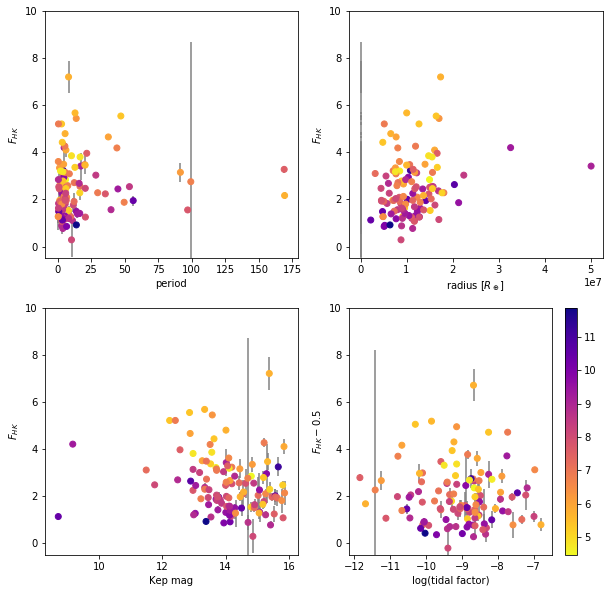

In [138]:
periods = np.array([r['koi_period'] for r in table_entries])
kepmags = np.array([r['kic_kepmag'] for r in table_entries])
rplanet = np.array([r['iso_prad'] for r in table_entries]) * R_earth
mstar = np.array([r['iso_smass'] for r in table_entries]) * M_sun
rstar = np.array([r['iso_srad'] for r in table_entries]) * R_sun
sma = np.array([r['iso_sma'] for r in table_entries]) * u.AU
rhop = np.array([r['assumed_density'] for r in table_entries]) * u.g/u.cm**3
mplanet = (rhop * (4/3 * np.pi * rplanet**3)).decompose()
brightness = np.array([r['brightness_score'] for r in table_entries])
ages = np.array([r['iso_sage'] for r in table_entries])
ages_err_1 = np.array([r['iso_sage_err1'] for r in table_entries])
ages_err_2 = np.array([r['iso_sage_err2'] for r in table_entries])
ages_err = np.vstack([abs(ages_err_2), ages_err_1]).T
t0 = np.array([r['koi_time0'] for r in table_entries])
rconv = np.interp((mstar/M_sun).decompose().value, [0.4, 1.0], [0.6, 0.7]) * R_sun

koi_numbers = np.array([r['koi_number'] for r in table_entries])

#tidal_factor = rplanet**3 * rhop / sma**3
#tidal_factor = (mplanet/mstar * (rstar/sma)**3).decompose() # epsilon in Ogilvie 2014
tidal_factor = (mplanet/mstar * (rconv/sma)**3).decompose().value # epsilon at the base of the convective zone
log_tides = np.log10(tidal_factor)

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
set_params = dict(ylim=[-0.5, 10])
# scatter_params = dict(c=brightness, cmap=plt.cm.plasma_r)
error_params = dict(fmt='none', ecolor='gray', zorder=-20)#color=plt.cm.plasma_r(brightness))
scatter_params = dict(c=ages, cmap=plt.cm.plasma_r)
ax[0, 0].errorbar(periods, hk_fluxes, yerr=hk_errors, **error_params)
ax[0, 0].scatter(periods, hk_fluxes, **scatter_params)
ax[0, 0].set(xlabel='period', ylabel='$F_{HK}$', **set_params)

ax[0, 1].errorbar((rplanet/R_earth).decompose(), hk_fluxes, yerr=hk_errors, **error_params)
cax = ax[0, 1].scatter(rplanet, hk_fluxes, **scatter_params)
ax[0, 1].set(xlabel='radius [$R_\oplus$]', ylabel='$F_{HK}$', **set_params)

ax[1, 0].errorbar(kepmags, hk_fluxes, yerr=hk_errors, **error_params)
ax[1, 0].scatter(kepmags, hk_fluxes, **scatter_params)
ax[1, 0].set(xlabel='Kep mag', ylabel='$F_{HK}$', **set_params)

ax[1, 1].errorbar(log_tides, hk_fluxes - 0.5, yerr=hk_errors, **error_params)
ax[1, 1].scatter(log_tides, hk_fluxes - 0.5, **scatter_params)
ax[1, 1].set(xlabel='log(tidal factor)', ylabel='$F_{HK} - 0.5$', **set_params)
cbar = fig.colorbar(cax)#, ticks=[-1, 0, 1])
#ax[1, 1].contourf(X, Y, Z, levels=levels, cmap=plt.cm.Reds)

In [139]:
import numpy as np
from astroquery.vizier import Vizier
Vizier.ROW_LIMIT = 1e10
# Rotation periods for Q3-Q14 KOIs (Mazeh+, 2015)
prot_table = Vizier.get_catalogs('J/ApJ/801/3/table1')[0] 
prot_table.add_index('KIC')

prot_mazeh = []
prot_mazeh_err = []
for r in table_entries:
    kic = r['id_kic']
    if kic in prot_table['KIC'].data.data:
        prot_mazeh.append(prot_table.loc[kic]['Prot'])
        prot_mazeh_err.append(prot_table.loc[kic]['e_Prot'])
    else: 
        prot_mazeh.append(0)
        prot_mazeh_err.append(0)

prot_mazeh = np.array(prot_mazeh)
prot_mazeh_err = np.array(prot_mazeh_err)
prot_mazeh[np.isnan(prot_mazeh)] = 0
prot_mazeh_err[np.isnan(prot_mazeh_err)] = 0

/Users/bmmorris/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


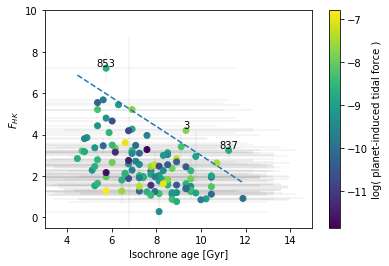

In [140]:
plt.errorbar(ages, hk_fluxes, xerr=[abs(ages_err_2), ages_err_1], yerr=hk_errors, 
             fmt='none', zorder=-20, ecolor='gray', alpha=0.1)
cax = plt.scatter(ages, hk_fluxes, c=log_tides, cmap=plt.cm.viridis)
x = np.sort(ages)

def boundary(age):
    return 10 - 0.7 * age

plt.plot(x, boundary(x), ls='--')

for a, f, n in zip(ages, hk_fluxes, koi_numbers):
    if f > 1.1 * boundary(a):
        plt.text(a, f+0.1, "{0}".format(int(n[1:])), ha='center')

plt.ylim([-0.5, 10])
plt.xlim([3, 15])
plt.xlabel('Isochrone age [Gyr]')
plt.ylabel('$F_{HK}$')
plt.colorbar(cax, label='log( planet-induced tidal force )')
plt.savefig('plots/envelope.png', dpi=150)

/Users/bmmorris/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:33: RuntimeWarning: divide by zero encountered in log10


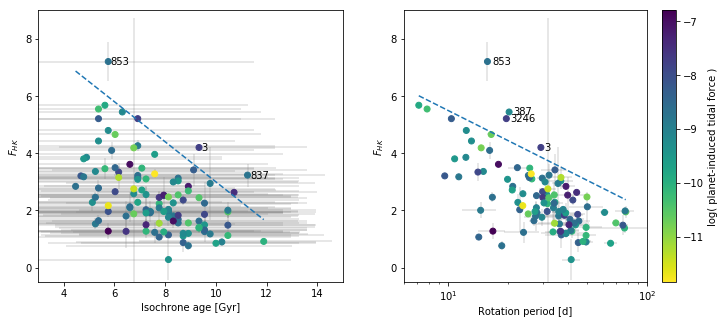

In [141]:
colormap = plt.cm.viridis_r
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].errorbar(ages, hk_fluxes, xerr=[abs(ages_err_2), ages_err_1], yerr=hk_errors, 
              fmt='none', zorder=-20, ecolor='gray', alpha=0.25)
cax = ax[0].scatter(ages, hk_fluxes, c=log_tides, cmap=colormap)
x = np.sort(ages)

def boundary_iso(age):
    return 10 - 0.7 * age

ax[0].plot(x, boundary_iso(x), ls='--')

active_kois_iso = []
for a, f, n in zip(ages, hk_fluxes, koi_numbers):
    if f > 1.1 * boundary_iso(a):
        ax[0].text(a+0.1, f, "{0}".format(int(n[1:])), ha='left', va='center')
        #active_kois_iso.append(int(n[1:]))

ax[0].set_ylim([-0.5, 9])
ax[0].set_xlim([3, 15])
ax[0].set_xlabel('Isochrone age [Gyr]')
ax[0].set_ylabel('$F_{HK}$')

# Rotation
ax[1].set_xscale("log", nonposx='clip')

ax[1].errorbar(prot_mazeh, hk_fluxes, xerr=prot_mazeh_err, yerr=hk_errors, 
              fmt='none', zorder=-20, ecolor='gray', alpha=0.25)
cax = ax[1].scatter(prot_mazeh, hk_fluxes, c=log_tides, cmap=colormap)
x = np.sort(prot_mazeh)

def boundary_rot(prot_i):
    return 9 - 3.5 * np.log10(prot_i)
ax[1].plot(x, boundary_rot(x), ls='--')

active_kois_rot = []
for protm, f, n in zip(prot_mazeh, hk_fluxes, koi_numbers):
    if f > 1.0 * boundary_rot(protm):
        ax[1].text(protm+1, f, "{0}".format(int(n[1:])), ha='left', va='center')
        active_kois_rot.append(int(n[1:]))

ax[1].set_xlim([6, 100])
ax[1].set_ylim([-0.5, 9])
#ax[1].set_xlim([3, 15])
ax[1].set_xlabel('Rotation period [d]')
ax[1].set_ylabel('$F_{HK}$')
fig.colorbar(cax, label='log( planet-induced tidal force )')
fig.savefig('plots/iso_rot.png', dpi=150)

/Users/bmmorris/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:43: RuntimeWarning: divide by zero encountered in log10


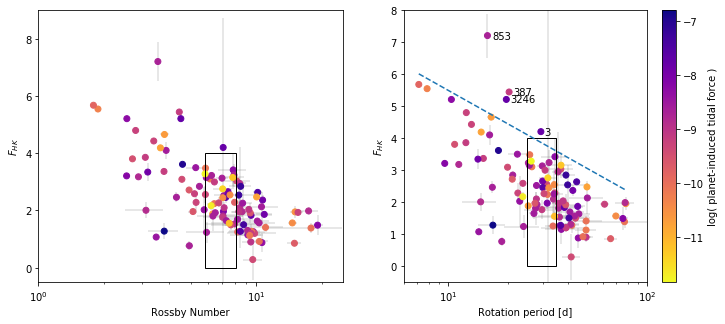

In [155]:
def wright2011_eqn11(mass):
    """Compute convective turnover timescale in days, given mass in solar masses"""
    if hasattr(mass, 'unit'):
        mass = (mass/M_sun).decompose().value
    return np.exp(1.16 - 1.49 * np.log(mass) - 0.54 * np.log(mass)**2)

rossby_numbers = prot_mazeh / wright2011_eqn11(mstar)
rossby_numbers_err = prot_mazeh_err / wright2011_eqn11(mstar)

colormap = plt.cm.plasma_r
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].set_xscale('log')
ax[0].errorbar(rossby_numbers, hk_fluxes, xerr=rossby_numbers_err, yerr=hk_errors, 
              fmt='none', zorder=-20, ecolor='gray', alpha=0.25)
cax = ax[0].scatter(rossby_numbers, hk_fluxes, c=log_tides, cmap=colormap)
x = np.sort(rossby_numbers)

def boundary_iso(age):
    return 10 - 0.7 * age

#ax[0].plot(x, boundary_iso(x), ls='--')

active_kois_iso = []
#for a, f, n in zip(ages, hk_fluxes, koi_numbers):
#    if f > 1.1 * boundary_iso(a):
#        ax[0].text(a+0.1, f, "{0}".format(int(n[1:])), ha='left', va='center')
#        #active_kois_iso.append(int(n[1:]))

ax[0].set_ylim([-0.5, 9])
ax[0].set_xlim([1, 25])
ax[0].set_xlabel('Rossby Number')
ax[0].set_ylabel('$F_{HK}$')

# Rotation
ax[1].set_xscale("log", nonposx='clip')

ax[1].errorbar(prot_mazeh, hk_fluxes, xerr=prot_mazeh_err, yerr=hk_errors, 
              fmt='none', zorder=-20, ecolor='gray', alpha=0.25)
cax = ax[1].scatter(prot_mazeh, hk_fluxes, c=log_tides, cmap=colormap)
x = np.sort(prot_mazeh)

def boundary_rot(prot_i):
    return 9 - 3.5 * np.log10(prot_i)
ax[1].plot(x, boundary_rot(x), ls='--')

active_kois_rot = []
for protm, f, n in zip(prot_mazeh, hk_fluxes, koi_numbers):
    if f > 1.0 * boundary_rot(protm):
        ax[1].text(protm+1, f, "{0}".format(int(n[1:])), ha='left', va='center')
        active_kois_rot.append(int(n[1:]))

# Draw bounding box: 

import matplotlib.patches as patches

min_period = 25
max_period = 35
max_fhk = 4.0
min_rossby = min_period/np.median(wright2011_eqn11(mstar))
max_rossby = max_period/np.median(wright2011_eqn11(mstar))

for p in [patches.Rectangle((min_rossby, 0.0), 
                             max_rossby-min_rossby, max_fhk, fill=False)]:
    ax[0].add_patch(p)
for p in [patches.Rectangle((min_period, 0.0), 
                             max_period-min_period, max_fhk, fill=False)]:
    ax[1].add_patch(p)
        
ax[1].set_xlim([6, 100])
ax[1].set_ylim([-0.5, 8])
#ax[1].set_xlim([3, 15])
ax[1].set_xlabel('Rotation period [d]')
ax[1].set_ylabel('$F_{HK}$')
fig.colorbar(cax, label='log( planet-induced tidal force )')
fig.savefig('plots/cks_activity.png', dpi=150)

[<matplotlib.text.Text at 0x11aa2d198>, <matplotlib.text.Text at 0x11a7e0128>]

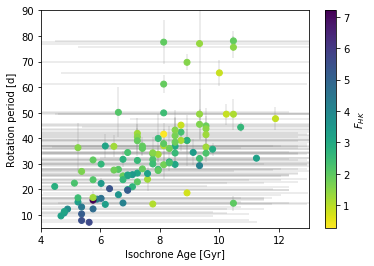

In [113]:
fig, ax = plt.subplots()
ax.errorbar(ages, prot_mazeh, 
             xerr=[abs(ages_err_2), ages_err_1], yerr=prot_mazeh_err,
             ecolor='gray', color='none', zorder=-20, alpha=0.2)
cax = ax.scatter(ages, prot_mazeh, c=hk_fluxes, cmap=plt.cm.viridis_r)
fig.colorbar(cax, label='$F_{HK}$')
ax.set_xlim([4, 13])
ax.set_ylim([5, 90])
ax.set(xlabel='Isochrone Age [Gyr]', ylabel='Rotation period [d]')

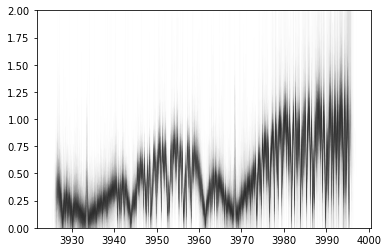

In [562]:
fig, ax = plt.subplots()

for i, order in enumerate(orders):
    norm_flux = normalize_order(order, hat11_spectrum.model_spectrum)[0]
    ax.plot(order.wavelength, norm_flux, 'k', lw=0.2, alpha=0.01)
ax.set_ylim([0, 2])
plt.show()

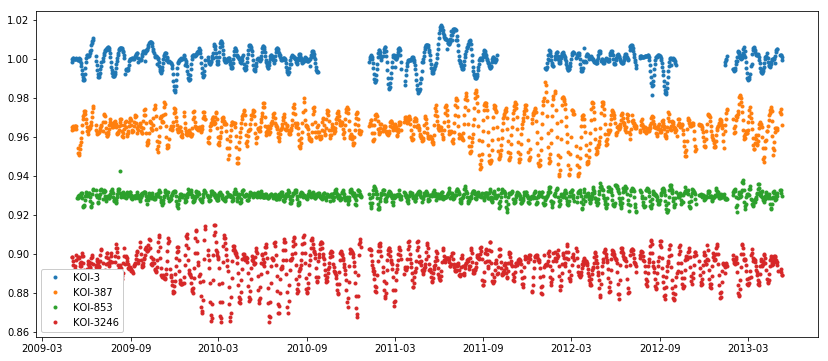

In [563]:
import kplr
from astropy.time import Time
client = kplr.API()

fig, ax = plt.subplots(figsize=(14, 6))

for i, koi_number_lc in enumerate(sorted(set(active_kois_iso + active_kois_rot))):
    koi_number_kplr = koi_number_lc + 0.01
    koi = client.koi(koi_number_kplr)

    # Get a list of light curve datasets.
    lcs = koi.get_light_curves(short_cadence=False)

    # Loop over the datasets and read in the data.
    time, flux, ferr = [], [], []
    for lc in lcs:
        with lc.open() as f:
            # The lightcurve data are in the first FITS HDU.
            hdu_data = f[1].data
            time.append(hdu_data["TIME"] + 2454833.0)
            flux.append(hdu_data["PDCSAP_FLUX"] / np.nanmedian(hdu_data["PDCSAP_FLUX"]))
            ferr.append(hdu_data["PDCSAP_FLUX_ERR"] / np.nanmedian(hdu_data["PDCSAP_FLUX"]))
    time = np.concatenate(time)
    flux = np.concatenate(flux)
    ferr = np.concatenate(ferr)
    not_nans = np.logical_not(np.isnan(time) | np.isnan(flux) | np.isnan(ferr))

    ax.plot_date(Time(time[not_nans][::50], format='jd').plot_date, 
                 flux[not_nans][::50] - 0.035*i, '.', 
                 label="KOI-{0}".format(koi_number_lc))
leg = ax.legend(facecolor='w')
leg.get_frame().set_alpha(1)
fig.savefig('plots/active_lcs.png', bbox_inches='tight', dpi=200)

In [564]:
def latexify_gauss_err(table, val_key, err_key, min_period_ind=None, loc_ind=None, fmt='.2f'):
    if loc_ind is not None:
        row = table.loc[loc_ind]
    else: 
        row = table
    
    if min_period_ind is None:
        return ("${0:"+fmt+"} \pm {1:"+fmt+"}$").format(row[val_key], 
                                                        row[err_key])
    else: 
        return ("${0:"+fmt+"} \pm {1:"+fmt+"}$").format(row[val_key][min_period_ind], 
                                                        row[err_key][min_period_ind])
def latexify_neq_err(table, val_key, err_key1, err_key2, min_period_ind=None, loc_ind=None, fmt='.2f'):
    if loc_ind is not None:
        row = table.loc[loc_ind]
    else: 
        row = table
        
    if min_period_ind is None:
        return ("${0:"+fmt+"}_{{{1:"+fmt+"}}}^{{+{2:"+fmt+"}}}$"
                ).format(row[val_key], row[err_key2], 
                         row[err_key1])
    else: 
        return ("${0:"+fmt+"}_{{{1:"+fmt+"}}}^{{+{2:"+fmt+"}}}$"
               ).format(row[val_key][min_period_ind], 
                        row[err_key2][min_period_ind],
                        row[err_key1][min_period_ind])

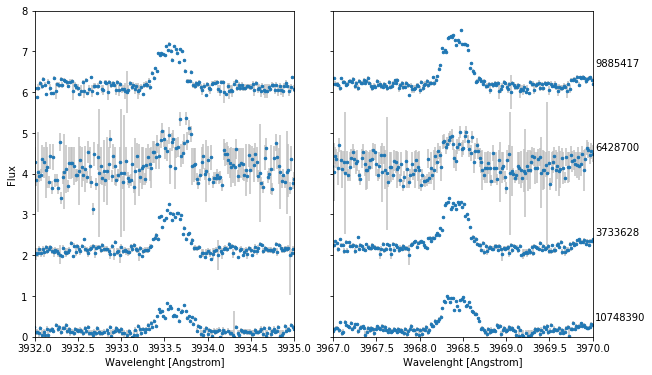

In [586]:
from astropy.table import Table, Column

latex_names = []
latex_periods = []
latex_pradii = []
latex_smas = []
koi_ns = []
latex_altnames = []
latex_prots = []
latex_ages = []
latex_smasses = []
latex_sradii = []
latex_hks = []
latex_kics = []

fig, ax = plt.subplots(1, 2, figsize=(10, 6), sharey=True)

for i, koi_n in enumerate(sorted(set(active_kois_iso + active_kois_rot))):
    entry = table.loc["K{0:05d}".format(koi_n)]
    multiple_planets = hasattr(entry['koi_period'], '__len__')
    min_period_ind = np.argmin(entry['koi_period'])
    mpi = min_period_ind if multiple_planets else None
    kic = entry['id_kic'] if not multiple_planets else entry['id_kic'][min_period_ind]
    tab_ent_ind = np.arange(len(table_entries))[np.array([r['id_kic'] for r in table_entries]) == kic]

    if hasattr(tab_ent_ind, '__len__'):
        tab_ent_ind = tab_ent_ind[0]
        
    # Add spectra to plot:
    norm_flux, norm_err = normalize_order(orders[tab_ent_ind], hat11_spectrum.model_spectrum)
    for axis in ax:
        #axis.plot(orders[tab_ent_ind].wavelength, 2*i + norm_flux, lw=0.5)
        axis.errorbar(orders[tab_ent_ind].wavelength.value, 2*i + norm_flux, 
                      yerr=norm_err, fmt='.', ms=5, ecolor='silver')
    ax[1].annotate(xy=(1.01, 0.26*i + 0.05), s=kic, xycoords='axes fraction')

    latex_hk = "${0:.2f} \pm {1:.2f}$".format(hk_fluxes[tab_ent_ind], hk_errors[tab_ent_ind])

    if multiple_planets:
        latex_period = entry['koi_period'][min_period_ind]
        latex_altname = entry['id_kepler_name'][min_period_ind]
    else: 
        latex_period = entry['koi_period']
        latex_altname = entry['id_kepler_name']

    latex_prot = latexify_gauss_err(prot_table, 'Prot', 'e_Prot', loc_ind=kic)
    latex_age = latexify_neq_err(entry, 'iso_sage', 'iso_sage_err1', 'iso_sage_err2', min_period_ind=mpi)
    latex_smass = latexify_neq_err(entry, 'iso_smass', 'iso_smass_err1', 'iso_smass_err2', min_period_ind=mpi)
    latex_prad = latexify_neq_err(entry, 'iso_prad', 'iso_prad_err1', 'iso_prad_err2', min_period_ind=mpi)
    latex_srad = latexify_neq_err(entry, 'iso_srad', 'iso_srad_err1', 'iso_srad_err2', min_period_ind=mpi)
    latex_sma = latexify_neq_err(entry, 'iso_sma', 'iso_sma_err1', 'iso_sma_err2', min_period_ind=mpi, fmt='.3f')
    
    latex_periods.append(latex_period)
    latex_pradii.append(latex_prad)
    latex_smas.append(latex_sma)
    koi_ns.append(koi_n)
    latex_altnames.append(latex_altname)
    latex_prots.append(latex_prot)
    latex_ages.append(latex_age)
    latex_smasses.append(latex_smass)
    latex_sradii.append(latex_srad)
    latex_hks.append(latex_hk)
    latex_kics.append(kic)
    
latex_output = Table([Column(latex_kics, 'KIC'),
                      Column(latex_altnames, 'Planet'),
                      Column(koi_ns, 'KOI'),
                      Column(latex_periods, '$P_{orb}$ [d]'),
                      Column(latex_pradii, '$R_p$ [$R_\oplus$]'), 
                      Column(latex_smas, '$a$ [AU]'),
                      Column(latex_smasses, '$M_\star$ [$M_\odot$]'),
                      Column(latex_sradii, '$R_\star$ [$R_\odot$]'),
                      Column(latex_prots, '$P_{rot}$ [d]'),
                      Column(latex_ages, 'Age [Gyr]'),
                      Column(latex_hks, '$F_{HK}$')])
latex_output.sort('KOI')

for axis in ax:
    axis.set_ylim([0, 8])
    axis.set_xlabel('Wavelenght [Angstrom]')
ax[0].set_xlim([3932, 3935])
ax[1].set_xlim([3967, 3970])
ax[0].set_ylabel('Flux')
fig.subplots_adjust(wspace=0.15)
fig.savefig('plots/candidate_spectra.png', bbox_inches='tight', dpi=150)
plt.show()

In [587]:
latex_output

KIC,Planet,KOI,$P_{orb}$ [d],$R_p$ [$R_\oplus$],$a$ [AU],$M_\star$ [$M_\odot$],$R_\star$ [$R_\odot$],$P_{rot}$ [d],Age [Gyr],$F_{HK}$
int64,str13,int64,float64,str22,str25,str22,str22,str16,str22,str15
10748390,Kepler-3 b,3,4.887802706,$5.11_{-0.41}^{+0.41}$,$0.053_{-0.001}^{+0.001}$,$0.83_{-0.03}^{+0.03}$,$0.81_{-0.03}^{+0.03}$,$29.31 \pm 0.49$,$9.33_{-5.52}^{+4.26}$,$4.20 \pm 0.05$
3733628,Kepler-543 b,387,13.89961966,$2.67_{-0.26}^{+0.26}$,$0.104_{-0.002}^{+0.002}$,$0.77_{-0.03}^{+0.03}$,$0.73_{-0.02}^{+0.03}$,$20.30 \pm 0.04$,$6.31_{-4.45}^{+5.48}$,$5.44 \pm 0.09$
6428700,Kepler-242 b,853,8.2039687,$2.73_{-0.28}^{+0.28}$,$0.073_{-0.001}^{+0.001}$,$0.78_{-0.03}^{+0.03}$,$0.74_{-0.02}^{+0.03}$,$15.81 \pm 0.01$,$5.75_{-4.14}^{+5.76}$,$7.21 \pm 0.69$
9885417,Kepler-1446 b,3246,0.689967832,$0.81_{-0.07}^{+0.07}$,$0.014_{-0.000}^{+0.000}$,$0.80_{-0.03}^{+0.03}$,$0.76_{-0.02}^{+0.03}$,$19.66 \pm 0.14$,$6.92_{-4.73}^{+5.43}$,$5.21 \pm 0.06$
